In [1]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x = t_x/255.0
s_tt_x = tt_x/255.0
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y = train_test_split(s_t_x,t_y,test_size=0.2,random_state=42)
t_x.shape

(48000, 28, 28)

모델생성

In [2]:
m1 = keras.Sequential()
m1.add(keras.layers.Flatten(input_shape=(28,28)))
m1.add(keras.layers.Dense(100,activation='relu'))
m1.add(keras.layers.Dense(300,activation='relu'))
m1.add(keras.layers.Dense(10,activation='softmax'))

m2 = keras.Sequential()
m2.add(keras.layers.Flatten(input_shape=(28,28)))
m2.add(keras.layers.Dense(300,activation='relu'))
m2.add(keras.layers.Dense(100,activation='relu'))
m2.add(keras.layers.Dense(10,activation='softmax'))

m3 = keras.Sequential()
m3.add(keras.layers.Flatten(input_shape=(28,28)))
m3.add(keras.layers.Dense(300,activation='relu'))
m3.add(keras.layers.Dense(100,activation='relu'))
m3.add(keras.layers.Dense(10,activation='softmax'))


모델학습

In [3]:
m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=m1.fit(t_x,t_y,epochs=30,validation_data=(v_x,v_y))
m2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history1=m2.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y))
m3.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')
history2=m3.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y))

Epoch 1/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4992 - accuracy: 0.8217 - val_loss: 0.4278 - val_accuracy: 0.8399
Epoch 2/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3727 - accuracy: 0.8621 - val_loss: 0.3588 - val_accuracy: 0.8683
Epoch 3/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3388 - accuracy: 0.8742 - val_loss: 0.3462 - val_accuracy: 0.8721
Epoch 4/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3123 - accuracy: 0.8852 - val_loss: 0.3435 - val_accuracy: 0.8756
Epoch 5/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2972 - accuracy: 0.8897 - val_loss: 0.3346 - val_accuracy: 0.8803
Epoch 6/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2797 - accuracy: 0.8952 - val_loss: 0.3223 - val_accuracy: 0.8816
Epoch 7/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2649 - accuracy: 0.9002 - val_loss: 0.3329 - val_accuracy:

1500/1500 [==============================] - 3s 2ms/step - loss: 0.3775 - accuracy: 0.8665 - val_loss: 0.3837 - val_accuracy: 0.8631
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3648 - accuracy: 0.8709 - val_loss: 0.3740 - val_accuracy: 0.8665
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3549 - accuracy: 0.8746 - val_loss: 0.3617 - val_accuracy: 0.8713
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3450 - accuracy: 0.8767 - val_loss: 0.3617 - val_accuracy: 0.8688
Epoch 11/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3368 - accuracy: 0.8792 - val_loss: 0.3720 - val_accuracy: 0.8677
Epoch 12/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3285 - accuracy: 0.8829 - val_loss: 0.3519 - val_accuracy: 0.8723
Epoch 13/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3210 - accuracy: 0.8837 - val_loss: 0.3497 - val_accuracy: 0.8752

시각화

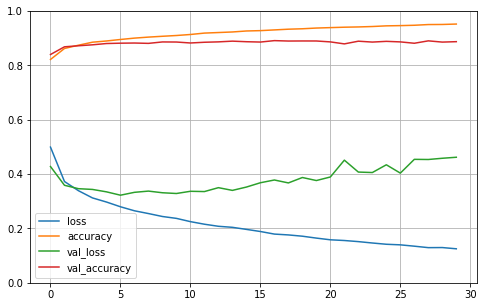

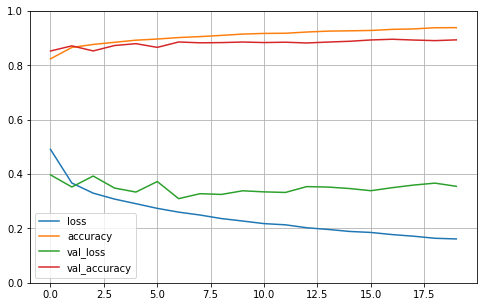

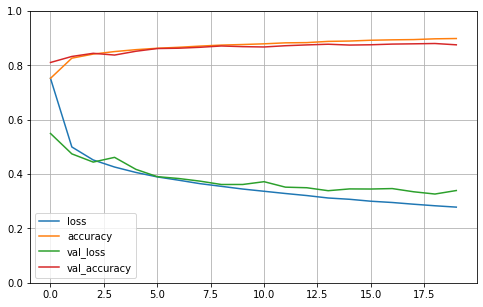

In [4]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

테스트검증

In [5]:
m1.evaluate(s_tt_x,tt_y),m2.evaluate(s_tt_x,tt_y),m3.evaluate(s_tt_x,tt_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.3674 - accuracy: 0.8630


([0.5058860182762146, 0.8842999935150146],
 [0.3923655152320862, 0.8878999948501587],
 [0.3673735558986664, 0.8629999756813049])

In [7]:
m4 = keras.Sequential()
m4.add(keras.layers.Flatten(input_shape=(28,28)))
m4.add(keras.layers.Dense(50,activation='relu'))
m4.add(keras.layers.Dense(40,activation='relu'))
m4.add(keras.layers.Dense(10,activation='relu'))
m4.add(keras.layers.Dense(10,activation='softmax'))
m4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 dense_10 (Dense)            (None, 40)                2040      
                                                                 
 dense_11 (Dense)            (None, 10)                410       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
Total params: 41,810
Trainable params: 41,810
Non-trainable params: 0
_________________________________________________________________


In [8]:
m4.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')
hy=m4.fit(t_x,t_y,epochs=40,validation_data=(v_x,v_y))

Epoch 1/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9961 - accuracy: 0.6669 - val_loss: 0.6426 - val_accuracy: 0.7790
Epoch 2/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5468 - accuracy: 0.8106 - val_loss: 0.5097 - val_accuracy: 0.8271
Epoch 3/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4839 - accuracy: 0.8314 - val_loss: 0.5054 - val_accuracy: 0.8227
Epoch 4/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4519 - accuracy: 0.8412 - val_loss: 0.4571 - val_accuracy: 0.8394
Epoch 5/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4270 - accuracy: 0.8495 - val_loss: 0.4444 - val_accuracy: 0.8475
Epoch 6/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4097 - accuracy: 0.8568 - val_loss: 0.4166 - val_accuracy: 0.8523
Epoch 7/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3958 - accuracy: 0.8619 - val_loss: 0.4000 - val_accuracy:

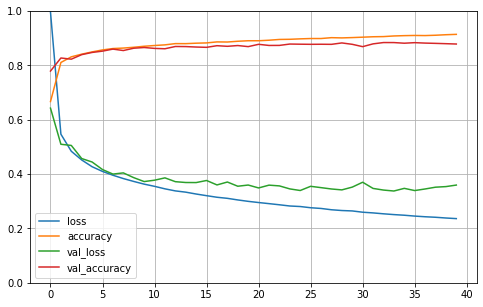

In [9]:
pd.DataFrame(hy.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

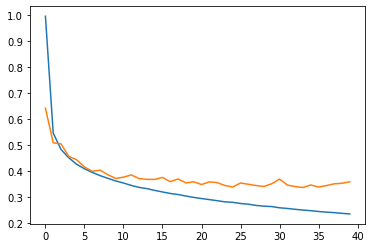

In [11]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

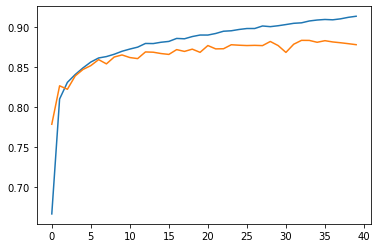

In [12]:
plt.plot(hy.history['accuracy'])
plt.plot(hy.history['val_accuracy'])

입력층 개수 = 입력층 특징수
출력층 개수 = 타겟(정답) 개수